# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle
import tensorflow as tf
from tensorflow.contrib.layers import flatten
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
# Visualizations will be shown in the notebook.
import random
from numpy.random import rand
import numpy as np
from collections import Counter
from sklearn import datasets
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.utils import shuffle
%matplotlib inline

# TODO: Fill this in based on where you saved the training and testing data

training_file = "D:/Self Driving Car Engineer/train.p"
testing_file = "D:/Self Driving Car Engineer/test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
train_features, train_labels = train['features'], train['labels']
test_features, test_labels = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 2D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [2]:
### Replace each question mark with the appropriate value.

# TODO: Number of training examples
n_train = len(train_features) 

# TODO: Number of testing examples.
n_test = len(test_features) 

# TODO: What's the shape of an traffic sign image?
image_shape = "{}x{}".format(len(train_features[0]), len(train_features[0][0]))
image_size = np.shape(train_features)[1]*np.shape(train_features)[2]

# TODO: How many unique classes/labels there are in the dataset.
n_classes = max(train_labels) + 1  # total classes (43 different trafffic signs)

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = 32x32
Number of classes = 43


Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

In [30]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.


[16  1 38 ...,  6  7 10]


In [3]:
z = np.array(train['labels'])
Counter(z)

Counter({0: 210,
         1: 2220,
         2: 2250,
         3: 1410,
         4: 1980,
         5: 1860,
         6: 420,
         7: 1440,
         8: 1410,
         9: 1470,
         10: 2010,
         11: 1320,
         12: 2100,
         13: 2160,
         14: 780,
         15: 630,
         16: 420,
         17: 1110,
         18: 1200,
         19: 210,
         20: 360,
         21: 330,
         22: 390,
         23: 510,
         24: 270,
         25: 1500,
         26: 600,
         27: 240,
         28: 540,
         29: 270,
         30: 450,
         31: 780,
         32: 240,
         33: 689,
         34: 420,
         35: 1200,
         36: 390,
         37: 210,
         38: 2070,
         39: 300,
         40: 360,
         41: 240,
         42: 240})

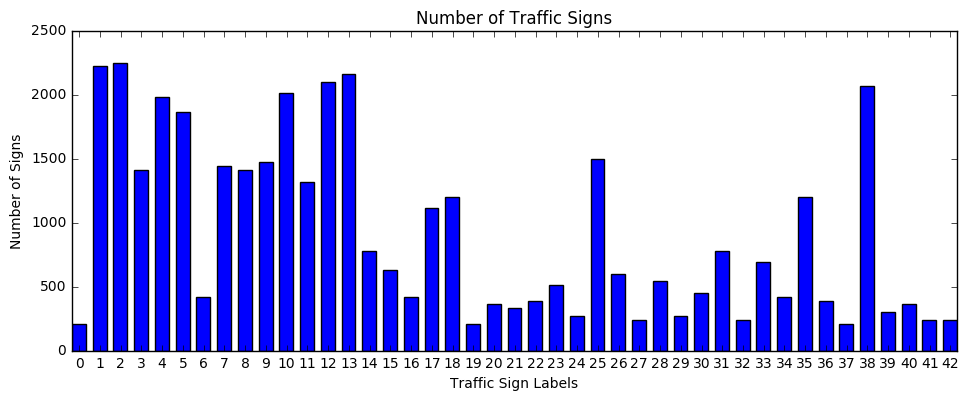

In [4]:
labels, values = zip(*Counter(z).items())

indexes = np.arange(len(labels))
width = 1


plt.xticks(indexes + 0.35, labels)
plt.ylabel('Number of Signs')
plt.xlabel('Traffic Sign Labels')

width = 1/1.5
#width = (1.-2.*margin)/indexes
plt.bar(indexes, values, width )
plt.subplots_adjust(bottom=0.1, right=1.6, top=0.9)

plt.title('Number of Traffic Signs')
plt.show()

24


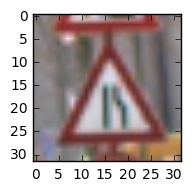

In [6]:
index = random.randint(0, len(train_features))
image = train_features[index].squeeze()

plt.figure(figsize=(1,1))
plt.imshow(image)
plt.subplots_adjust(bottom=0.1, right=1.6, top=2.9)
print(train_labels[index])


----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [4]:
### Preprocess the data here.
### Feel free to use as many code cells as needed.

In [7]:
# Normalize features
train_features = train_features / 255. * 0.8 + 0.1

print('Randomizing datasets...')
from sklearn.model_selection import train_test_split
train_features, valid_features, train_labels, valid_labels = train_test_split(
   train_features,
   train_labels,
   test_size=0.2,
   random_state=0
)


Randomizing datasets...


In [8]:

def SignNet(x):
    # convolutional and pooling layers.    
    # Hyperparameters
    mu = 0
    sigma = 0.1

    #out_height = ceil(float(in_height - filter_height + 1) / float(strides[1]))
    #out_width  = ceil(float(in_width - filter_width + 1) / float(strides[1]))
    
    #out_height = ceil(float(32 - 5 + 1) / float(1)) = 28
    #out_width = ceil(float(32 - 5 + 1) / float(1)) = 28
    
    # Layer 1: Convolutional. Input = 32x32x3. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 3, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1 = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b  
    
    #Activation.
    conv1 = tf.nn.relu(conv1)

    #out_height = ceil(float(28 - 2 + 1) / float(2)) = 14
    #out_width = ceil(float(28 - 2 + 1) / float(2)) = 14   
    
    #Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
  
    #out_height = ceil(float(16 - 5 + 1) / float(1)) = 10
    #out_width = ceil(float(16 - 5 + 1) / float(1)) = 10    
    
    # Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2 = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b

    #Activation.
    conv2 = tf.nn.relu(conv2)

    #out_height = ceil(float(10 - 2 + 1) / float(2)) = 5
    #out_width = ceil(float(10 - 2 + 1) / float(2)) = 5 
    #Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # Flatten. Input = 5x5x16. Output = 400.
    fc0 = flatten(conv2)
    
    # Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # Activation.
    fc1    = tf.nn.relu(fc1)
    
    
    #Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b = tf.Variable(tf.zeros(84))
    fc2 = tf.matmul(fc1, fc2_W) + fc2_b
    
    #Activation.
    fc2 = tf.nn.relu(fc2)

    #Layer 5: Fully Connected. Input = 84. Output = 43.
    fc3_W = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma))
    fc3_b = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits

In [9]:
# Input dimensions
# the data consists of 32x32x3, images
x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32,(None))

one_hot_y = tf.one_hot(y, 43)

In [10]:
#training pipeline

rate = 0.0001

logits = SignNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y) #softmax
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

In [11]:
EPOCHS = 20   #100
BATCH_SIZE = 25   #150

#checking the numbers
features_count = train_features.shape[0]
print(features_count)
labels_count = train_labels.shape[0]
print(labels_count)


31367
31367


In [12]:
#Model evaluation
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    #sess.run(tf.global_variables_initializer())
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples


In [13]:
#Train model
save_file = 'C:/CarND-Traffic-Signs/signnet'

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(train_features)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        train_features, train_labels = shuffle(train_features, train_labels)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = train_features[offset:end], train_labels[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
            
        validation_accuracy = evaluate(valid_features, valid_labels)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    try:
        saver
    except NameError:
        saver = tf.train.Saver()
    saver.save(sess, save_file)
    print("Model saved")

Training...

EPOCH 1 ...
Validation Accuracy = 0.356

EPOCH 2 ...
Validation Accuracy = 0.553

EPOCH 3 ...
Validation Accuracy = 0.675

EPOCH 4 ...
Validation Accuracy = 0.739

EPOCH 5 ...
Validation Accuracy = 0.785

EPOCH 6 ...
Validation Accuracy = 0.827

EPOCH 7 ...
Validation Accuracy = 0.830

EPOCH 8 ...
Validation Accuracy = 0.855

EPOCH 9 ...
Validation Accuracy = 0.873

EPOCH 10 ...
Validation Accuracy = 0.887

EPOCH 11 ...
Validation Accuracy = 0.902

EPOCH 12 ...
Validation Accuracy = 0.907

EPOCH 13 ...
Validation Accuracy = 0.906

EPOCH 14 ...
Validation Accuracy = 0.909

EPOCH 15 ...
Validation Accuracy = 0.913

EPOCH 16 ...
Validation Accuracy = 0.920

EPOCH 17 ...
Validation Accuracy = 0.929

EPOCH 18 ...
Validation Accuracy = 0.931

EPOCH 19 ...
Validation Accuracy = 0.936

EPOCH 20 ...
Validation Accuracy = 0.939

Model saved


# Evaluate Model

In [14]:
#Evaluate Model - only do this once!!

with tf.Session() as sess:
    loader = tf.train.import_meta_graph('C:/CarND-Traffic-Signs/signnet.meta')
    loader.restore(sess, tf.train.latest_checkpoint('./'))

    test_accuracy = evaluate(test_features, test_labels)
    print("Test Accuracy = {:.3f}".format(test_accuracy))



Test Accuracy = 0.843


### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_

**Answer:**

I used the LeNet architrecture as it was the 'easiest' one to understand. The data were shuffled to randomise and prevent the model from memorising a partcular path. The train features were normalised so the data was not skewed and make the optimiser easier to 'descend'.It would be hard for the classifier to tune the learning rate.

In [ ]:
### Generate data additional data (OPTIONAL!)
### and split the data into training/validation/testing sets here.
### Feel free to use as many code cells as needed.

### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

**Answer:**

I split the training data, and made 20% of it as validation data. I did not touch the testing data until I tweaked the training model and it was good enough.

In [ ]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:**

INPUT -> layer 1 -> ACT -> POOL -> layer 2 -> ACT -> POOL -> FLATTEN -> layer 3 -> ACT -> layer 4 -> ACT - Full Connection

Input with a depth of 3, strides of 1, pool with stride 2, the final out put is length of 43, which is the number of classes.

In [ ]:
### Train your model here.
### Feel free to use as many code cells as needed.


### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:**
I used a learning rate of 0.0001. I tried other learning rates, but it looks like this was the best for my case. The batches were taken as 25. For start, I only trained using 20 Epochs, of course accuracy could be increased by setting to 100 epochs or tuning the hyperparemeters. After a while, there would be a limit towards the accuracy and learning rate, so I don't think setting the epochs more than 100 would be useful.

I used tensorflow's adamoptimizer, but I actually also experimented with the gradientdescentOptimizer, which also allows me to tweak the learning rate and parameters.

### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:**
I spent every available hour just using and trying many different values for the parameters.I did use the LeNet architecture as a base since it was similar to what we are trying to achieve- assigning images to classes, except it is in colour, with 43 classes instead of 10. Most of the time I spent on trying to get the model to fit and work, since when I first started I had no idea what parameters to use. It was really frustrating, and initially, I only got to maximum accuracy levels of around 5%. 

I started with a high learning rate, of around 0.2, with a set number of batches such as 100. I would keep the batches the same, and tried multiple variations of the learning rate. Similarly, I set the learning rate the same,and tried for each rate for: (0.2/0.1/0.01/0.001/0.0001) experimented with many different batch sizes:(20/50/100/150/250/1000), with different numbers of Epochs (3/5/10/20).

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

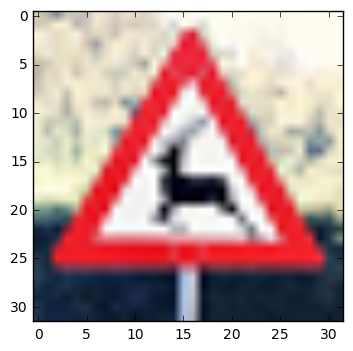

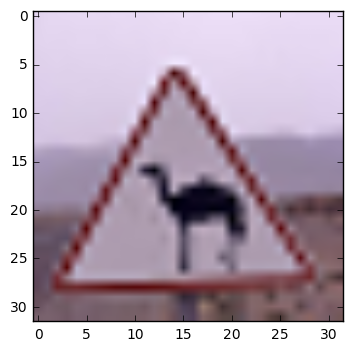

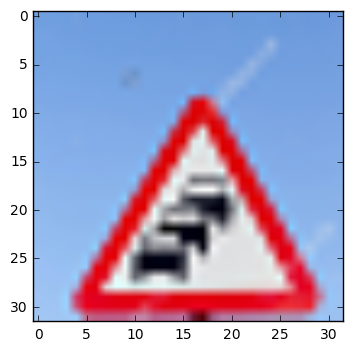

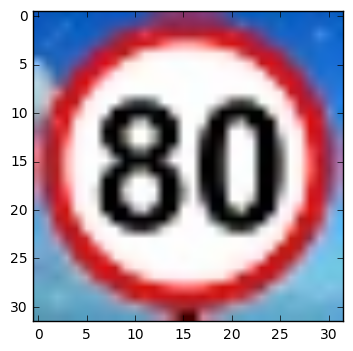

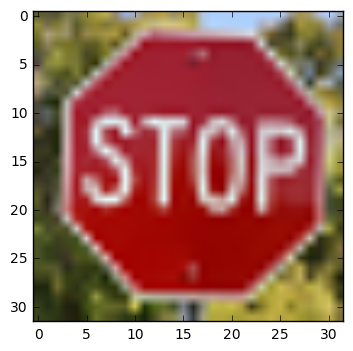

In [50]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
import matplotlib.image as mpimg

imgs = ['deer2.png', 'camel.png', 'heavy_tr2.png', 'limit80.png', 'stop2.png']

new_images = []

for imgname in imgs:
    image = mpimg.imread('C:/CarND-Traffic-Signs/' + imgname)
    new_images.append(image)
    plt.imshow(image)
    plt.show()


### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



**Answer:**

The classifier should be able to recognise 3 out of the 5 images. The "Stop" sign , 'limit 80', and the 'wild animals' crossing sign (deer) I also picked 2 images that were not in the signnames file - wild camel(?), and heavy traffic. The classifier may classify these as something else known in the 43 classes since they both have triangular shapes/backgrounds. Perhaps I should have used actual photos for most of these signs, since it would be interesting to see if the classifier can still read the signs despite the background noise/colour. Even though there are backgrounds, the classifer should still be able to recognise 3.

In [44]:
### Run the predictions here.
### Feel free to use as many code cells as needed.

#init = tf.global_variables_initializer()
#sess.run(tf.global_variables_initializer())
#sess = tf.get_default_session()
#new_predictions = sess.run(cross_entropy, feed_dict={x: new_images})

In [51]:
with tf.Session() as sess:
    loader = tf.train.import_meta_graph('C:/CarND-Traffic-Signs/signnet.meta')
    loader.restore(sess, tf.train.latest_checkpoint('./'))
    
    
    new_predictions = sess.run(logits, feed_dict={x: new_images, y: (None) })
    
    
    

ValueError: Cannot feed value of shape (5, 32, 32, 4) for Tensor 'Placeholder:0', which has shape '(?, 32, 32, 3)'

### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


**Answer:**

In [ ]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.

### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

**Answer:**

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.